In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

## Generating training dataset

In [3]:
n_pts = 100

centers = [[1.0, 1.0], [-1.0,-1.0]]

# 등방성 가우시안 정규분포 이용해 가상 데이터 생성; 보통 클러스터링용 가상데이터 생성 시 이용
# n_samples: 표본 데이터 수, n_features: 독립 변수의 수 centers: 생성할 클러스터의 수/중심; [n_centers, n_features] 크기 배열
# 반환값 - X: [n_samples, n_features] 크기의 배열; 독립 변수, y: [n_samples] 크기의 배열; 종속 변수
X, y = datasets.make_blobs(n_samples=n_pts, n_features=2, centers=centers, cluster_std = 1.0)

x_data = torch.Tensor(X) # feature 값
y_data = torch.Tensor(y.reshape(n_pts,1)) # class

#print(x_data)
#print(y_data)

## Defining scatter plot function

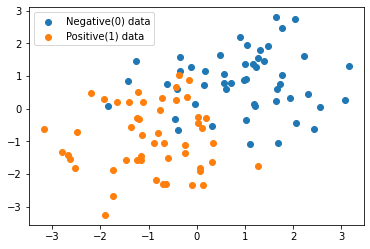

In [23]:
def scatterplot():
  plt.scatter(X[y==0, 0], X[y==0, 1], label='Negative(0) data')
  plt.scatter(X[y==1, 0], X[y==1, 1], label='Positive(1) data')
  plt.legend(loc='best')

scatterplot()

## Defining model class

z = w1x1 + w2x2 + b ->
y = a = sigma(z) ->
L(y_hat = a, y)

In [4]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size) # 선형 회귀 모델

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred # probability

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

torch.manual_seed(1) # 초기화 시 발생하는 random number 고정; 항상 같은 난수 발생하도록
model=LogisticRegression(2,1)
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


## Function to get model parameters (w1, w2, b)

In [21]:
[w, b] = model.parameters()
# print(w)
w1, w2 = w.view(2)

def get_params():
  return(w1.item(), w2.item(), b[0].item())

## Show the initial fit plot

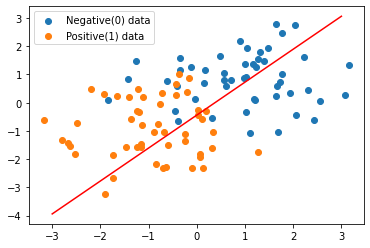

In [24]:
def fitplot():
  w1, w2, b = get_params()
  x1 = np.array([-3, 3])
  x2 = (w1*x1 + b)/(-w2)
  plt.plot(x1, x2, 'r') # plt.plot(x축, y축)
  scatterplot()
  plt.show()


fitplot()

## Training the model

In [26]:
criterion = nn.BCELoss() # binary case인 경우 (softmax 포함X -> activation function 따로 구현 필요)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

epochs=1000
losses=[]

for i in range(epochs):
  y_pred = model.forward(x_data)

  loss = criterion(y_pred,y_data)
  print("epoch: ",i,"loss: ",loss.item())
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch:  0 loss:  0.7589150071144104
epoch:  1 loss:  0.7493127584457397
epoch:  2 loss:  0.7399508953094482
epoch:  3 loss:  0.7308238744735718
epoch:  4 loss:  0.7219263315200806
epoch:  5 loss:  0.7132527232170105
epoch:  6 loss:  0.7047976851463318
epoch:  7 loss:  0.6965558528900146
epoch:  8 loss:  0.6885218620300293
epoch:  9 loss:  0.6806904673576355
epoch:  10 loss:  0.673056423664093
epoch:  11 loss:  0.6656146049499512
epoch:  12 loss:  0.6583598852157593
epoch:  13 loss:  0.651287317276001
epoch:  14 loss:  0.6443918347358704
epoch:  15 loss:  0.6376688480377197
epoch:  16 loss:  0.6311134099960327
epoch:  17 loss:  0.6247208714485168
epoch:  18 loss:  0.618486762046814
epoch:  19 loss:  0.6124067306518555
epoch:  20 loss:  0.6064762473106384
epoch:  21 loss:  0.6006911396980286
epoch:  22 loss:  0.5950472354888916
epoch:  23 loss:  0.5895406007766724
epoch:  24 loss:  0.5841670632362366
epoch:  25 loss:  0.5789230465888977
epoch:  26 loss:  0.5738046169281006
epoch:  27 los

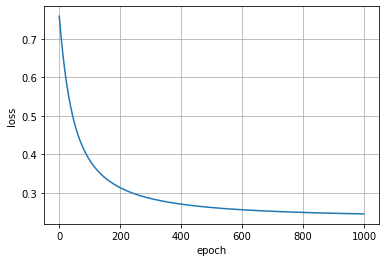

In [27]:
plt.plot(range(epochs),losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

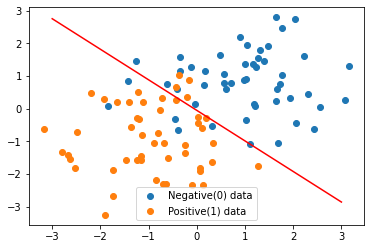

In [28]:
fitplot()

## Model evaluation with new datasets the model has never seen before

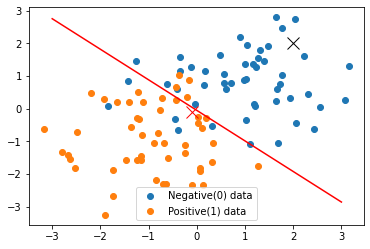

red x (+ , 1) prob= 0.5539740324020386
red x's class = 1
black x (+, 1) prob = 0.002750794868916273
black x's class = 0


In [30]:
pnt1 = torch.Tensor([-0.1, -0.1])
pnt2 = torch.Tensor([2.0, 2.0])
plt.plot(pnt1.numpy()[0], pnt1.numpy()[1], 'rx', markersize=12)
plt.plot(pnt2.numpy()[0],pnt2.numpy()[1],'kx',markersize=12)
fitplot()

print("red x (+ , 1) prob= {}".format(model.forward(pnt1).item()))
print("red x's class = {}".format(model.predict(pnt1)))
print("black x (+, 1) prob = {}".format(model.forward(pnt2).item()))
print("black x's class = {}".format(model.predict(pnt2)))